In [2]:
#Initial imports 
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Removes all unnecessary warnings by Python
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Imports for better visualization

from collections import defaultdict
import scipy as sp
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (14, 6)
rcParams['figure.dpi'] = 250
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 25
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [5]:
#Show all the columns 
pd.set_option('display.max_columns',None)

In [14]:
#Load the files 
defdam = pd.read_csv("defdam.csv")
defdav = pd.read_csv('defdav.csv')

In [16]:
defdam.head()

,Account Number,date of default,Default sum,date,month,year
0,M100,2/25/2015,1037.2,25,2,2015
1,M104,3/13/2015,611.8,13,3,2015
2,M114,3/7/2015,2193.5,7,3,2015
3,M125,3/2/2015,507.8,2,3,2015
4,M132,2/27/2015,1405.5,27,2,2015


In [17]:
defdav.head()

,Account Number,date of default,Default sum,date,month,year
0,V5,7/13/2015,713.4,13,7,2015
1,V48,7/1/2015,1402.8,1,7,2015
2,V74,7/11/2015,899.9,11,7,2015
3,V79,6/29/2015,1483.2,29,6,2015
4,V95,5/30/2015,1350.3,30,5,2015


In [19]:
defdam.isnull().sum()

Account Number     0
date of default    0
Default sum        0
date               0
month              0
year               0
dtype: int64

In [20]:
#deleting date of default is it a mistake??
del defdam['date of default']
del defdav['date of default']
del defdam['date']
del defdav['date']
del defdam['year']
del defdav['year']

In [25]:
bill = pd.get_dummies(defdam['month'])
dfm = pd.concat([defdam, bill], axis=1)
dfm.rename(columns={1: 'Jan_def',2:'Feb_def',3:'Mar_def'}, inplace=True)
del dfm['month']
dfm.head()

,Account Number,Default sum,Jan_def,Feb_def,Mar_def
0,M100,1037.2,0.0,1.0,0.0
1,M104,611.8,0.0,0.0,1.0
2,M114,2193.5,0.0,0.0,1.0
3,M125,507.8,0.0,0.0,1.0
4,M132,1405.5,0.0,1.0,0.0


In [26]:
bill = pd.get_dummies(defdav['month'])
dfv = pd.concat([defdav, bill], axis=1)
del dfv['month']
dfv.rename(columns={5:'May_def',6:'Jun_def',7:'July_def'}, inplace=True)
dfv.head()

,Account Number,Default sum,May_def,Jun_def,July_def
0,V5,713.4,0.0,0.0,1.0
1,V48,1402.8,0.0,0.0,1.0
2,V74,899.9,0.0,0.0,1.0
3,V79,1483.2,0.0,1.0,0.0
4,V95,1350.3,1.0,0.0,0.0


In [27]:
bill = pd.get_dummies(defdav['month'])
dfv = pd.concat([defdav, bill], axis=1)
del dfv['month']
dfv.rename(columns={5:'May_def',6:'Jun_def',7:'July_def'}, inplace=True)
dfv.head()

,Account Number,Default sum,May_def,Jun_def,July_def
0,V5,713.4,0.0,0.0,1.0
1,V48,1402.8,0.0,0.0,1.0
2,V74,899.9,0.0,0.0,1.0
3,V79,1483.2,0.0,1.0,0.0
4,V95,1350.3,1.0,0.0,0.0


In [28]:
dfm['Jan_def'] = dfm['Jan_def']*dfm['Default sum']
dfm['Feb_def'] = dfm['Feb_def']*dfm['Default sum']
dfm['Mar_def'] = dfm['Mar_def']*dfm['Default sum']

In [29]:
dfv['May_def'] = dfv['May_def']*dfv['Default sum']
dfv['Jun_def'] = dfv['Jun_def']*dfv['Default sum']
dfv['July_def'] = dfv['July_def']*dfv['Default sum']

In [30]:
defm = dfm.groupby('Account Number').sum()
defv = dfv.groupby('Account Number').sum()

In [31]:
defm

,Default sum,Jan_def,Feb_def,Mar_def
Account Number,,,,
M100,1037.2,0.0,1037.2,0.0
M1002,2815.2,938.4,938.4,938.4
M1039,1802.6,0.0,1066.8,735.8
M104,611.8,0.0,0.0,611.8
M1045,649.8,0.0,0.0,649.8
M1049,969.1,969.1,0.0,0.0
M1072,549.9,549.9,0.0,0.0
M1077,1552.4,776.2,776.2,0.0
M1086,774.4,0.0,0.0,774.4


In [32]:
defm = dfm.groupby('Account Number').sum()
defv = dfv.groupby('Account Number').sum()

In [33]:
defm.to_csv('defdamup.csv',index=True)
defv.to_csv('defdavup.csv',index=True)

In [35]:
#Reading in all the data from different datasets 
paydam = pd.read_excel('paydam.xlsx')
paydav = pd.read_csv('paydv.csv')

In [36]:
del paydam['Year_pay']
del paydav['Year_pay']
del paydam['date_pay']
del paydav['date_pay']

In [37]:
del paydam['Realization Date']
del paydav['Realization Date']

In [38]:
bill = pd.get_dummies(paydam['month_pay'])
billu = pd.get_dummies(paydam['Paytype'])
dfm = pd.concat([paydam, bill,billu], axis=1)
dfm.rename(columns={1: 'Jan',2:'Feb',3:'Mar'}, inplace=True)
del dfm['month_pay']
del dfm['Paytype']
dfm.head()

,Account Number,Sum,Jan,Feb,Mar,Card I TYPE,Card II TYPE,Other,Paper based/Post
0,M1,1209.810,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,M1,1209.810,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,M1,1209.810,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,M2,751.695,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,M2,751.695,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [39]:
bill = pd.get_dummies(paydav['month_pay'])
billu = pd.get_dummies(paydav['Paytype'])
dfv = pd.concat([paydav, bill,billu], axis=1)
del dfv['month_pay']
del dfv['Paytype']
dfv.rename(columns={5:'May',6:'Jun',7:'July'}, inplace=True)
dfv.head()

,Account Number,Sum,May,Jun,July,Card I TYPE,Card II TYPE,Paper based/Post
0,V1,2061.465,0.0,1.0,0.0,0.0,1.0,0.0
1,V1,748.965,1.0,0.0,0.0,0.0,1.0,0.0
2,V1,748.965,0.0,0.0,1.0,0.0,1.0,0.0
3,V2,824.670,0.0,1.0,0.0,0.0,1.0,0.0
4,V2,824.670,1.0,0.0,0.0,0.0,1.0,0.0


In [40]:
dfm['Jan'] = dfm['Jan']*dfm['Sum']
dfm['Feb'] = dfm['Feb']*dfm['Sum']
dfm['Mar'] = dfm['Mar']*dfm['Sum']

In [41]:
dfv['May'] = dfv['May']*dfv['Sum']
dfv['Jun'] = dfv['Jun']*dfv['Sum']
dfv['July'] = dfv['July']*dfv['Sum']

In [42]:
dfm.rename(columns={'Jan':'Jan_pay','Feb':'Feb_pay','Mar':'Mar_pay'}, inplace=True)
dfv.rename(columns={'May':'May_pay','Jun':'Jun_pay','July':'July_pay'}, inplace=True)

In [43]:
defm = dfm.groupby('Account Number').sum()
defv = dfv.groupby('Account Number').sum()

In [44]:
defm.to_csv('paydamup.csv',index=True)
defv.to_csv('paydavup.csv',index=True)

In [45]:
defv.head()

,Sum,May_pay,Jun_pay,July_pay,Card I TYPE,Card II TYPE,Paper based/Post
Account Number,,,,,,,
V1,3559.395,748.965,2061.465,748.965,0.0,3.0,0.0
V10,3370.185,1123.395,1123.395,1123.395,0.0,3.0,0.0
V1000,1988.910,662.970,662.970,662.970,0.0,3.0,0.0
V1001,2251.620,750.540,750.540,750.540,3.0,0.0,0.0
V1002,32.760,10.920,10.920,10.920,0.0,3.0,0.0


In [46]:
 # Change name of card one and cardtwo in excel manually 

In [47]:
#Reading in all the data from different datasets 
usepam = pd.read_csv('usepam.csv')
usepav = pd.read_csv('usepav.csv')

In [48]:
usepam.dtypes
usepav.dtypes
usepam.head()
usepav.head()

Account Number                          object
Used pattern in hours                  float64
Usage Post Limit Utilization in hrs      int64
data used Gb                           float64
month_use                                int64
dtype: object

Account Number                          object
Used pattern in hours                  float64
Usage Post Limit Utilization in hrs      int64
data used Gb                           float64
month_use                                int64
dtype: object

,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,month_use
0,M1,717.90,0,43.80,1
1,M1,662.42,0,110.35,2
2,M1,634.68,0,109.10,3
3,M2,696.12,5,98.40,1
4,M2,652.40,0,70.90,2


,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,month_use
0,V1,400.52,0,78.15,5
1,V1,587.93,0,37.30,6
2,V1,647.40,0,115.00,7
3,V2,699.75,232,226.30,5
4,V2,658.43,35,119.10,6


In [49]:
bill = pd.get_dummies(usepam['month_use'])
dfm = pd.concat([usepam, bill], axis=1)
dfm.rename(columns={1: 'Jan',2:'Feb',3:'Mar'}, inplace=True)
del dfm['month_use']
dfm.head()

,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,Jan,Feb,Mar
0,M1,717.90,0,43.80,1.0,0.0,0.0
1,M1,662.42,0,110.35,0.0,1.0,0.0
2,M1,634.68,0,109.10,0.0,0.0,1.0
3,M2,696.12,5,98.40,1.0,0.0,0.0
4,M2,652.40,0,70.90,0.0,1.0,0.0


In [50]:
bill = pd.get_dummies(usepav['month_use'])
dfv = pd.concat([usepav, bill], axis=1)
del dfv['month_use']
dfv.rename(columns={5:'May',6:'Jun',7:'July'}, inplace=True)
dfv.head()

,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,May,Jun,July
0,V1,400.52,0,78.15,1.0,0.0,0.0
1,V1,587.93,0,37.30,0.0,1.0,0.0
2,V1,647.40,0,115.00,0.0,0.0,1.0
3,V2,699.75,232,226.30,1.0,0.0,0.0
4,V2,658.43,35,119.10,0.0,1.0,0.0


In [51]:
dfm['Jan_hours'] = dfm['Jan']*dfm['Used pattern in hours']
dfm['Feb_hours'] = dfm['Feb']*dfm['Used pattern in hours']
dfm['Mar_hours'] = dfm['Mar']*dfm['Used pattern in hours']
dfm['Jan_gb'] = dfm['Jan']*dfm['data used Gb']
dfm['Feb_gb'] = dfm['Feb']*dfm['data used Gb']
dfm['Mar_gb'] = dfm['Mar']*dfm['data used Gb']
dfm['Jan_postlimit'] = dfm['Jan']*dfm['Usage Post Limit Utilization in hrs']
dfm['Feb_postlimit'] = dfm['Feb']*dfm['Usage Post Limit Utilization in hrs']
dfm['Mar_postlimit'] = dfm['Mar']*dfm['Usage Post Limit Utilization in hrs']

In [52]:
dfv['May_hours'] = dfv['May']*dfv['Used pattern in hours']
dfv['Jun_hours'] = dfv['Jun']*dfv['Used pattern in hours']
dfv['July_hours'] = dfv['July']*dfv['Used pattern in hours']
dfv['May_gb'] = dfv['May']*dfv['data used Gb']
dfv['Jun_gb'] = dfv['Jun']*dfv['data used Gb']
dfv['July_gb'] = dfv['July']*dfv['data used Gb']
dfv['May_postlimit'] = dfv['May']*dfv['Usage Post Limit Utilization in hrs']
dfv['Jun_postlimit'] = dfv['Jun']*dfv['Usage Post Limit Utilization in hrs']
dfv['July_postlimit'] = dfv['July']*dfv['Usage Post Limit Utilization in hrs']


In [53]:
defm = dfm.groupby('Account Number ').sum()
defv = dfv.groupby('Account Number ').sum()

In [54]:
defm.rename(columns={'Account Number ':'Account Number'}, inplace=True)
defv.rename(columns={'Account Number ':'Account Number'}, inplace=True)

In [55]:
defm.to_csv('usepamup.csv',index=True)
defv.to_csv('usepavup.csv',index=True)

In [56]:
defm.head()

,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,Jan,Feb,Mar,Jan_hours,Feb_hours,Mar_hours,Jan_gb,Feb_gb,Mar_gb,Jan_postlimit,Feb_postlimit,Mar_postlimit
Account Number,,,,,,,,,,,,,,,
M1,2015.00,0,263.25,1.0,1.0,1.0,717.90,662.42,634.68,43.80,110.35,109.10,0.0,0.0,0.0
M10,1814.40,0,101.85,1.0,1.0,1.0,613.60,592.20,608.60,39.95,31.15,30.75,0.0,0.0,0.0
M100,2082.43,0,523.75,1.0,1.0,1.0,730.35,678.18,673.90,178.90,166.45,178.40,0.0,0.0,0.0
M1000,1237.47,0,1.45,1.0,1.0,1.0,449.92,354.65,432.90,1.45,0.00,0.00,0.0,0.0,0.0
M10000,2069.07,597,328.20,1.0,1.0,1.0,721.22,618.17,729.68,110.25,114.95,103.00,323.0,274.0,0.0


In [86]:
cacen = pd.read_csv('cacenmup.csv') 
payda = pd.read_csv('paydamup.csv')
defda = pd.read_csv('defdamup.csv')
usepa = pd.read_csv('usepamup.csv')

In [87]:
#cacen = pd.read_csv('cacenvup.csv') 
#payda = pd.read_csv('paydavup.csv')
#defda = pd.read_csv('defdavup.csv')
#usepa = pd.read_csv('usepavup.csv')

In [88]:
demog = pd.read_csv('AFMVIM.csv')

In [89]:
demog.head(50)

,Account Number,Commence Date,Address,Scheme,Staus,Gender,Zone,Eqipsale,Age,Equipment Warranty,Salslab,profinfo,agehome,Equipment Warranty Expiry Date,Churn,Churn Date
0,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5.0,0.0,17.0,2015-04-03,0,NaN
1,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7.0,0.0,22.0,2015-04-03,0,NaN
2,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,1.0,5.0,17.0,2016-04-03,0,NaN
3,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,6.0,14.0,22.0,2015-04-03,0,NaN
4,M5,2015-01-18,VALID,PRP,Open,other,Western,RENTED,47.5,Full Year,4.0,0.0,12.0,2016-01-03,0,NaN
5,M6,2013-09-05,VALID,KLA,Open,other,Eastern,BOUGHT,46.0,Three Full Years,4.0,0.0,12.0,2015-09-03,0,NaN
6,M7,2012-07-05,VALID,KLA,Open,other,Eastern,BOUGHT,46.0,Three Full Years,4.0,0.0,12.0,2015-04-03,0,NaN
7,M8,2011-12-01,VALID,PWM,Open,Female,Eastern,RENTED,49.0,Three Full Years,10.0,5.0,21.0,2015-03-20,0,NaN
8,M9,2011-10-13,VALID,PWR,Open,Female,Eastern,RENTED,63.0,Three Full Years,6.0,5.0,17.0,2015-03-09,0,NaN
9,M10,2011-11-17,VALID,PWM,Open,Male,Western,RENTED,79.0,Three Full Years,5.0,14.0,17.0,2015-03-11,0,NaN


In [90]:
demog.isnull().sum()

Account Number                       0
Commence Date                        3
Address                            386
Scheme                               0
Staus                                0
Gender                               0
Zone                                 0
Eqipsale                             0
Age                                  0
Equipment Warranty                   0
Salslab                              0
profinfo                             0
agehome                              0
Equipment Warranty Expiry Date     408
Churn                                0
Churn Date                        9460
dtype: int64

In [91]:
cacen.head()
payda.head()
defda.head()
usepa.head()
demog.head()
cacen.shape
payda.shape
defda.shape
usepa.shape
demog.shape
cacen.isnull().sum()
payda.isnull().sum()
defda.isnull().sum()
usepa.isnull().sum()
demog.isnull().sum()

,Account Number,ILPS_Others,ILPS_ABC_BM,ILPS_Acc_CE,ILPS_TP,ILPS_OC,ILPS_PS_GI,ILPS_PS_Others,ILPS_SO,ILPS_U,ILT_Others,ILT_ABC,ILT_Acc,ILT_TP,ILT_OC,ILT_Outbound,ILT_PS,ILT_SO,ILT_U_EA,ILT_U_AO3,No_compl
0,M100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,M1002,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,M1007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,M101,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3,0,5
4,M1010,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


,Account Number,Sum,Jan_pay,Feb_pay,Mar_pay,cardone,cardtwo,paper
0,M1,3629.430,1209.810,1209.810,1209.810,0,3,0
1,M10,3515.085,1171.695,1171.695,1171.695,0,3,0
2,M1000,2604.420,868.140,868.140,868.140,0,3,0
3,M10000,2923.725,904.575,1009.575,1009.575,0,3,0
4,M1001,2896.110,965.370,965.370,965.370,0,3,0


,Account Number,Default sum,Jan_def,Feb_def,Mar_def
0,M100,1037.2,0.0,1037.2,0.0
1,M1002,2815.2,938.4,938.4,938.4
2,M1039,1802.6,0.0,1066.8,735.8
3,M104,611.8,0.0,0.0,611.8
4,M1045,649.8,0.0,0.0,649.8


,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,Jan,Feb,Mar,Jan_hours,Feb_hours,Mar_hours,Jan_gb,Feb_gb,Mar_gb,Jan_postlimit,Feb_postlimit,Mar_postlimit
0,M1,2015.00,0,263.25,1.0,1.0,1.0,717.90,662.42,634.68,43.80,110.35,109.10,0.0,0.0,0.0
1,M10,1814.40,0,101.85,1.0,1.0,1.0,613.60,592.20,608.60,39.95,31.15,30.75,0.0,0.0,0.0
2,M100,2082.43,0,523.75,1.0,1.0,1.0,730.35,678.18,673.90,178.90,166.45,178.40,0.0,0.0,0.0
3,M1000,1237.47,0,1.45,1.0,1.0,1.0,449.92,354.65,432.90,1.45,0.00,0.00,0.0,0.0,0.0
4,M10000,2069.07,597,328.20,1.0,1.0,1.0,721.22,618.17,729.68,110.25,114.95,103.00,323.0,274.0,0.0


,Account Number,Commence Date,Address,Scheme,Staus,Gender,Zone,Eqipsale,Age,Equipment Warranty,Salslab,profinfo,agehome,Equipment Warranty Expiry Date,Churn,Churn Date
0,M1,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5.0,0.0,17.0,2015-04-03,0,NaN
1,M2,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7.0,0.0,22.0,2015-04-03,0,NaN
2,M3,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,1.0,5.0,17.0,2016-04-03,0,NaN
3,M4,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,6.0,14.0,22.0,2015-04-03,0,NaN
4,M5,2015-01-18,VALID,PRP,Open,other,Western,RENTED,47.5,Full Year,4.0,0.0,12.0,2016-01-03,0,NaN


(3570, 21)

(9676, 8)

(1185, 5)

(9669, 16)

(9966, 16)

Account Number    0
ILPS_Others       0
ILPS_ABC_BM       0
ILPS_Acc_CE       0
ILPS_TP           0
ILPS_OC           0
ILPS_PS_GI        0
ILPS_PS_Others    0
ILPS_SO           0
ILPS_U            0
ILT_Others        0
ILT_ABC           0
ILT_Acc           0
ILT_TP            0
ILT_OC            0
ILT_Outbound      0
ILT_PS            0
ILT_SO            0
ILT_U_EA          0
ILT_U_AO3         0
No_compl          0
dtype: int64

Account Number    0
Sum               0
Jan_pay           0
Feb_pay           0
Mar_pay           0
cardone           0
cardtwo           0
paper             0
dtype: int64

Account Number    0
Default sum       0
Jan_def           0
Feb_def           0
Mar_def           0
dtype: int64

Account Number                         0
Used pattern in hours                  0
Usage Post Limit Utilization in hrs    0
data used Gb                           0
Jan                                    0
Feb                                    0
Mar                                    0
Jan_hours                              0
Feb_hours                              0
Mar_hours                              0
Jan_gb                                 0
Feb_gb                                 0
Mar_gb                                 0
Jan_postlimit                          0
Feb_postlimit                          0
Mar_postlimit                          0
dtype: int64

Account Number                       0
Commence Date                        3
Address                            386
Scheme                               0
Staus                                0
Gender                               0
Zone                                 0
Eqipsale                             0
Age                                  0
Equipment Warranty                   0
Salslab                              0
profinfo                             0
agehome                              0
Equipment Warranty Expiry Date     408
Churn                                0
Churn Date                        9460
dtype: int64

In [92]:
demog['Address'].fillna('VALID',inplace= True)

In [93]:
dem = pd.read_excel('exl_data_Y.xlsx',sheetname='Demographic Data')
a = dem['Commence Date']


In [94]:
b = dem['Account Number']
e = dem['Equipment Warranty Expiry Date']

In [95]:
c = {'Commence Date':a,'Account Number':b,'Equipment Warranty Expiry Date':e}
d = pd.DataFrame(data=c)

In [96]:
d['Commence Date']=d['Commence Date'].astype(str)
d['Commence Date'] = d['Commence Date']+ 'a'
d['date_comm'] = d['Commence Date'].str.extract('-(\d\d)a', expand=True)
d['month_comm'] = d['Commence Date'].str.extract('-(\d\d)-', expand=True)
d['Year_comm'] = d['Commence Date'].str.extract('(\d\d\d\d)-', expand=True)
d.head()

,Account Number,Commence Date,Equipment Warranty Expiry Date,date_comm,month_comm,Year_comm
0,M1,2011-11-04a,2015-04-03,04,11,2011
1,M2,2011-11-28a,2015-04-03,28,11,2011
2,M3,2011-12-06a,2016-04-03,06,12,2011
3,M4,2011-10-28a,2015-04-03,28,10,2011
4,M5,2015-01-18a,2016-01-03,18,01,2015


In [97]:
d['Equipment Warranty Expiry Date']=d['Equipment Warranty Expiry Date'].astype(str)
d['Equipment Warranty Expiry Date'] = d['Equipment Warranty Expiry Date']+ 'a'
d['date_ew'] = d['Equipment Warranty Expiry Date'].str.extract('-(\d\d)a', expand=True)
d['month_ew'] = d['Equipment Warranty Expiry Date'].str.extract('-(\d\d)-', expand=True)
d['Year_ew'] = d['Equipment Warranty Expiry Date'].str.extract('(\d\d\d\d)-', expand=True)
d.head()

,Account Number,Commence Date,Equipment Warranty Expiry Date,date_comm,month_comm,Year_comm,date_ew,month_ew,Year_ew
0,M1,2011-11-04a,2015-04-03a,04,11,2011,03,04,2015
1,M2,2011-11-28a,2015-04-03a,28,11,2011,03,04,2015
2,M3,2011-12-06a,2016-04-03a,06,12,2011,03,04,2016
3,M4,2011-10-28a,2015-04-03a,28,10,2011,03,04,2015
4,M5,2015-01-18a,2016-01-03a,18,01,2015,03,01,2016


In [98]:
del d['Commence Date']
del d['Equipment Warranty Expiry Date']

In [99]:
demog = pd.merge(d,demog,on='Account Number',how='inner')

In [100]:
df = pd.merge(demog,payda,on='Account Number',how='outer')

In [101]:
df1 = pd.merge(df,usepa,left_on='Account Number',right_on='Account Number ',how='outer')

In [102]:
df2 = pd.merge(df1,cacen,left_on='Account Number',right_on='Account Number',how='outer')

In [103]:
df3 =  pd.merge(df2,defda,left_on='Account Number',right_on='Account Number',how='outer')

In [104]:
df3.to_csv('Mergere1.csv',index=False)

In [106]:
df3.head()

,Account Number,date_comm,month_comm,Year_comm,date_ew,month_ew,Year_ew,Commence Date,Address,Scheme,Staus,Gender,Zone,Eqipsale,Age,Equipment Warranty,Salslab,profinfo,agehome,Equipment Warranty Expiry Date,Churn,Churn Date,Sum,Jan_pay,Feb_pay,Mar_pay,cardone,cardtwo,paper,Account Number,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,Jan,Feb,Mar,Jan_hours,Feb_hours,Mar_hours,Jan_gb,Feb_gb,Mar_gb,Jan_postlimit,Feb_postlimit,Mar_postlimit,ILPS_Others,ILPS_ABC_BM,ILPS_Acc_CE,ILPS_TP,ILPS_OC,ILPS_PS_GI,ILPS_PS_Others,ILPS_SO,ILPS_U,ILT_Others,ILT_ABC,ILT_Acc,ILT_TP,ILT_OC,ILT_Outbound,ILT_PS,ILT_SO,ILT_U_EA,ILT_U_AO3,No_compl,Default sum,Jan_def,Feb_def,Mar_def
0,M1,04,11,2011,03,04,2015,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5.0,0.0,17.0,2015-04-03,0.0,NaN,3629.430,1209.810,1209.810,1209.810,0.0,3.0,0.0,M1,2015.00,0.0,263.25,1.0,1.0,1.0,717.90,662.42,634.68,43.80,110.35,109.1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M2,28,11,2011,03,04,2015,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7.0,0.0,22.0,2015-04-03,0.0,NaN,2255.085,751.695,751.695,751.695,0.0,3.0,0.0,M2,1844.29,5.0,272.80,1.0,1.0,1.0,696.12,652.40,495.77,98.40,70.90,103.5,5.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN
2,M3,06,12,2011,03,04,2016,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,1.0,5.0,17.0,2016-04-03,0.0,NaN,3193.155,1064.385,1064.385,1064.385,0.0,3.0,0.0,M3,2012.82,0.0,194.85,1.0,1.0,1.0,737.62,531.47,743.73,69.85,49.90,75.1,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M4,28,10,2011,03,04,2015,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,6.0,14.0,22.0,2015-04-03,0.0,NaN,4126.500,963.375,1674.750,1488.375,0.0,3.0,0.0,M4,2010.53,0.0,172.00,1.0,1.0,1.0,743.23,669.10,598.20,58.70,56.70,56.6,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M5,18,01,2015,03,01,2016,2015-01-18,VALID,PRP,Open,other,Western,RENTED,47.5,Full Year,4.0,0.0,12.0,2016-01-03,0.0,NaN,2616.180,839.895,919.590,856.695,0.0,3.0,0.0,M5,1293.18,0.0,17.60,1.0,1.0,1.0,285.52,409.43,598.23,12.50,3.70,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN


In [107]:
df3['ILPS_ABC_BM'].fillna(0,inplace=True)
df3['ILPS_Acc_CE'].fillna(0,inplace=True)
df3['ILPS_OC'].fillna(0,inplace=True)
df3['ILPS_Others'].fillna(0,inplace=True)
df3['ILPS_PS_GI'].fillna(0,inplace=True)
df3['ILPS_PS_Others'].fillna(0,inplace=True)
df3['ILPS_SO'].fillna(0,inplace=True)
df3['ILPS_TP'].fillna(0,inplace=True)
df3['ILPS_U'].fillna(0,inplace=True)
df3['ILT_ABC'].fillna(0,inplace=True)
df3['ILT_Acc'].fillna(0,inplace=True)
df3['ILT_OC'].fillna(0,inplace=True)
df3['ILT_Others'].fillna(0,inplace=True)
df3['ILT_Outbound'].fillna(0,inplace=True)
df3['ILT_PS'].fillna(0,inplace=True)
df3['ILT_SO'].fillna(0,inplace=True)
df3['ILT_TP'].fillna(0,inplace=True)
df3['ILT_U_AO3'].fillna(0,inplace=True)
df3['ILT_U_EA'].fillna(0,inplace=True)

In [108]:
del df3['Account Number ']

In [109]:
df3.head()

,Account Number,date_comm,month_comm,Year_comm,date_ew,month_ew,Year_ew,Commence Date,Address,Scheme,Staus,Gender,Zone,Eqipsale,Age,Equipment Warranty,Salslab,profinfo,agehome,Equipment Warranty Expiry Date,Churn,Churn Date,Sum,Jan_pay,Feb_pay,Mar_pay,cardone,cardtwo,paper,Used pattern in hours,Usage Post Limit Utilization in hrs,data used Gb,Jan,Feb,Mar,Jan_hours,Feb_hours,Mar_hours,Jan_gb,Feb_gb,Mar_gb,Jan_postlimit,Feb_postlimit,Mar_postlimit,ILPS_Others,ILPS_ABC_BM,ILPS_Acc_CE,ILPS_TP,ILPS_OC,ILPS_PS_GI,ILPS_PS_Others,ILPS_SO,ILPS_U,ILT_Others,ILT_ABC,ILT_Acc,ILT_TP,ILT_OC,ILT_Outbound,ILT_PS,ILT_SO,ILT_U_EA,ILT_U_AO3,No_compl,Default sum,Jan_def,Feb_def,Mar_def
0,M1,04,11,2011,03,04,2015,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5.0,0.0,17.0,2015-04-03,0.0,NaN,3629.430,1209.810,1209.810,1209.810,0.0,3.0,0.0,2015.00,0.0,263.25,1.0,1.0,1.0,717.90,662.42,634.68,43.80,110.35,109.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,M2,28,11,2011,03,04,2015,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7.0,0.0,22.0,2015-04-03,0.0,NaN,2255.085,751.695,751.695,751.695,0.0,3.0,0.0,1844.29,5.0,272.80,1.0,1.0,1.0,696.12,652.40,495.77,98.40,70.90,103.5,5.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN
2,M3,06,12,2011,03,04,2016,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,1.0,5.0,17.0,2016-04-03,0.0,NaN,3193.155,1064.385,1064.385,1064.385,0.0,3.0,0.0,2012.82,0.0,194.85,1.0,1.0,1.0,737.62,531.47,743.73,69.85,49.90,75.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,M4,28,10,2011,03,04,2015,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,6.0,14.0,22.0,2015-04-03,0.0,NaN,4126.500,963.375,1674.750,1488.375,0.0,3.0,0.0,2010.53,0.0,172.00,1.0,1.0,1.0,743.23,669.10,598.20,58.70,56.70,56.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,M5,18,01,2015,03,01,2016,2015-01-18,VALID,PRP,Open,other,Western,RENTED,47.5,Full Year,4.0,0.0,12.0,2016-01-03,0.0,NaN,2616.180,839.895,919.590,856.695,0.0,3.0,0.0,1293.18,0.0,17.60,1.0,1.0,1.0,285.52,409.43,598.23,12.50,3.70,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN


In [110]:
df3['Sum'].describe()

count     9676.000000
mean      2413.566505
std       1290.920768
min          1.575000
25%               NaN
50%               NaN
75%               NaN
max      69045.795000
Name: Sum, dtype: float64

In [112]:
df3.groupby('Salslab').Sum.agg(['count','mean','median'])

,count,mean,median
Salslab,,,
1.0,429,2323.212378,2242.1700
2.0,427,2273.816557,2242.1700
3.0,1982,2420.856478,2259.6525
4.0,3082,2348.918717,2251.6200
5.0,1325,2487.204419,2316.5100
6.0,1445,2480.287692,2266.1100
7.0,489,2512.373006,2346.7500
8.0,200,2535.309000,2350.8450
9.0,164,2430.744878,2260.1250


In [113]:
#Mean was increasing as grouping by Salsalb for sum from 2300 to 2900
df3.loc[df3.Sum.isnull(),'Sum'] = df3.groupby('Salslab').Sum.transform('mean')

In [117]:
df3 = df3.rename(columns={' cardtwo':'cardtwo'})
df3['cardtwo'].fillna(3.0,inplace=True)
df3['cardone '].fillna(0.0,inplace=True)
df3['paper'].fillna(0.0,inplace=True)

In [118]:
df3['Jan_pay'].fillna(df3['Sum']/3,inplace=True)
df3['Feb_pay'].fillna(df3['Sum']/3,inplace=True)
df3['Mar_pay'].fillna(df3['Sum']/3,inplace=True)

In [119]:
df3 = df3.rename(columns={'Jan':'Jan_usepa','Feb':'Feb_usepa','Mar':'Mar_usepa'})
df3['Jan_usepa'].fillna(1,inplace=True)
df3['Feb_usepa'].fillna(1,inplace=True)
df3['Mar_usepa'].fillna(1,inplace=True)

In [120]:
df3 = df3.rename(columns={'Usage Post Limit Utilization in hrs':'Use_post_limit'})
df3["Use_post_limit"].fillna(0.0,inplace=True)
df3["Mar_postlimit"].fillna(0.0,inplace=True)
df3["Feb_postlimit"].fillna(0.0,inplace=True)
df3["Jan_postlimit"].fillna(0.0,inplace=True)

In [121]:
df3 = df3.rename(columns={'Used pattern in hours':'used_time_hours','data used Gb':'data_used_gb'})

In [122]:
df3['log_data_gb'] = np.log(1+df3["data_used_gb"])
df3['log_Jan_gb'] = np.log(1+df3["Jan_gb"])
df3['log_Feb_gb'] = np.log(1+df3["Feb_gb"])
df3['log_Mar_gb'] = np.log(1+df3["Mar_gb"])

In [123]:
#Mean as grouping by Scheme
df3.loc[df3.log_data_gb.isnull(),'log_data_gb'] = df3.groupby('Scheme').log_data_gb.transform('mean')
df3.loc[df3.log_Jan_gb.isnull(),'log_Jan_gb'] = df3.groupby('Scheme').log_Jan_gb.transform('mean')
df3.loc[df3.log_Feb_gb.isnull(),'log_Feb_gb'] = df3.groupby('Scheme').log_Feb_gb.transform('mean')
df3.loc[df3.log_Mar_gb.isnull(),'log_Mar_gb'] = df3.groupby('Scheme').log_Mar_gb.transform('mean')

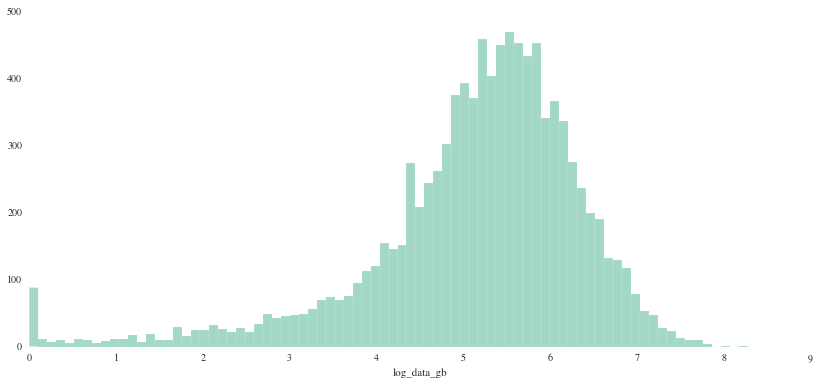

In [124]:
sns.distplot(df3['log_data_gb'].dropna(),bins=80,kde=False)

,count,mean,median
Scheme,,,
CHC,734,613.398896,648.935
CNN,874,620.369954,649.520
ESS,86,569.530814,627.895
KLA,954,628.598029,707.495
MXX,291,654.039450,713.400
PMM,15,593.254667,663.180
POP,453,674.177594,704.580
PPL,1748,421.538953,610.545
PRM,1359,651.637601,685.320


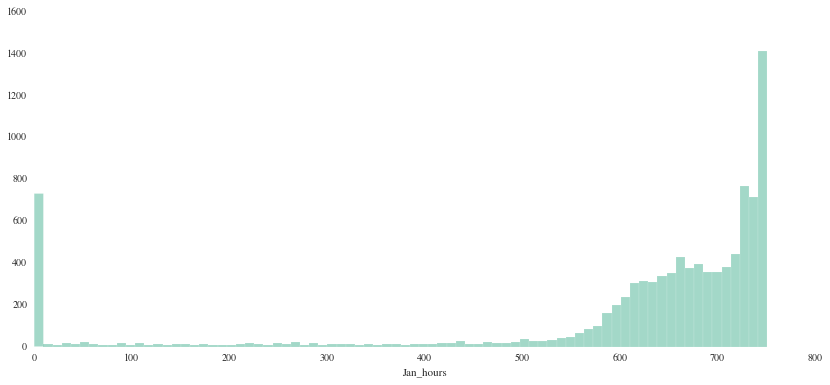

In [125]:
sns.distplot(df3['Jan_hours'].dropna(),bins=80,kde=False)
df3.groupby('Scheme').Jan_hours.agg(['count','mean','median'])

In [126]:
#Median as grouping by Scheme
df3.loc[df3.used_time_hours.isnull(),'used_time_hours'] = df3.groupby('Scheme').used_time_hours.transform('median')
df3.loc[df3.Jan_hours.isnull(),'Jan_hours'] = df3.groupby('Scheme').Jan_hours.transform('median')
df3.loc[df3.Feb_hours.isnull(),'Feb_hours'] = df3.groupby('Scheme').Feb_hours.transform('median')
df3.loc[df3.Mar_hours.isnull(),'Mar_hours'] = df3.groupby('Scheme').Mar_hours.transform('median')

In [127]:
df3[df3['month_ew'].isnull()]['month_ew'] = df3[df3['month_ew'].isnull()]['month_comm']

In [128]:
df3[df3['date_ew'].isnull()]['date_ew'] = df3[df3['date_ew'].isnull()]['date_comm']

In [129]:
df3.to_csv('Mergere2_exl.csv',index=False)


In [132]:
merger = pd.read_csv('Mergere2_exl.csv')

In [133]:
merger.head()

,Account Number,date_comm,month_comm,Year_comm,date_ew,month_ew,Year_ew,Commence Date,Address,Scheme,Staus,Gender,Zone,Eqipsale,Age,Equipment Warranty,Salslab,profinfo,agehome,Equipment Warranty Expiry Date,Churn,Churn Date,Sum,Jan_pay,Feb_pay,Mar_pay,cardone,cardtwo,paper,used_time_hours,Use_post_limit,data_used_gb,Jan_usepa,Feb_usepa,Mar_usepa,Jan_hours,Feb_hours,Mar_hours,Jan_gb,Feb_gb,Mar_gb,Jan_postlimit,Feb_postlimit,Mar_postlimit,ILPS_Others,ILPS_ABC_BM,ILPS_Acc_CE,ILPS_TP,ILPS_OC,ILPS_PS_GI,ILPS_PS_Others,ILPS_SO,ILPS_U,ILT_Others,ILT_ABC,ILT_Acc,ILT_TP,ILT_OC,ILT_Outbound,ILT_PS,ILT_SO,ILT_U_EA,ILT_U_AO3,No_compl,Default sum,Jan_def,Feb_def,Mar_def,log_data_gb,log_Jan_gb,log_Feb_gb,log_Mar_gb
0,M1,4.0,11.0,2011.0,3.0,4.0,2015.0,2011-11-04,VALID,KLA,Open,Female,Northern,RENTED,70.0,Three Full Years,5.0,0.0,17.0,2015-04-03,0.0,NaN,3629.430,1209.810,1209.810,1209.810,0.0,3.0,0.0,2015.00,0.0,263.25,1.0,1.0,1.0,717.90,662.42,634.68,43.80,110.35,109.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.576896,3.802208,4.712678,4.701389
1,M2,28.0,11.0,2011.0,3.0,4.0,2015.0,2011-11-28,VALID,PPL,Open,Female,Western,RENTED,55.0,Three Full Years,7.0,0.0,22.0,2015-04-03,0.0,NaN,2255.085,751.695,751.695,751.695,0.0,3.0,0.0,1844.29,5.0,272.80,1.0,1.0,1.0,696.12,652.40,495.77,98.40,70.90,103.5,5.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,5.612398,4.599152,4.275276,4.649187
2,M3,6.0,12.0,2011.0,3.0,4.0,2016.0,2011-12-06,VALID,KLA,Open,Male,Eastern,RENTED,64.0,Three Full Years,1.0,5.0,17.0,2016-04-03,0.0,NaN,3193.155,1064.385,1064.385,1064.385,0.0,3.0,0.0,2012.82,0.0,194.85,1.0,1.0,1.0,737.62,531.47,743.73,69.85,49.90,75.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.277349,4.260565,3.929863,4.332048
3,M4,28.0,10.0,2011.0,3.0,4.0,2015.0,2011-10-28,VALID,MXX,Open,Female,Northern,RENTED,66.0,Three Full Years,6.0,14.0,22.0,2015-04-03,0.0,NaN,4126.500,963.375,1674.750,1488.375,0.0,3.0,0.0,2010.53,0.0,172.00,1.0,1.0,1.0,743.23,669.10,598.20,58.70,56.70,56.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.153292,4.089332,4.055257,4.053523
4,M5,18.0,1.0,2015.0,3.0,1.0,2016.0,2015-01-18,VALID,PRP,Open,other,Western,RENTED,47.5,Full Year,4.0,0.0,12.0,2016-01-03,0.0,NaN,2616.180,839.895,919.590,856.695,0.0,3.0,0.0,1293.18,0.0,17.60,1.0,1.0,1.0,285.52,409.43,598.23,12.50,3.70,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,2.923162,2.602690,1.547563,0.875469


In [137]:
merger['used_time_hours'].isnull().sum()

0

In [164]:
merg= pd.read_csv('Merge8.csv')

In [171]:
merg.head(5)

,Account Number,Age,agehome,Churn,Jan_pay,Feb_pay,Mar_pay,cardone,cardtwo,paper,data_used_gb,Jan_hours,Feb_hours,Mar_hours,Jan_postlimit,Feb_postlimit,Mar_postlimit,ILPS_Others,ILPS_ABC_BM,ILPS_TP,ILPS_PS_GI,ILPS_PS_Others,ILPS_SO,ILPS_U,ILT_ABC,ILT_Acc,ILT_TP,ILT_OC,ILT_Outbound,ILT_U_EA,ILT_U_AO3,No_compl,Jan_def,Feb_def,Mar_def,log_data_gb,year_diff__2.0,year_diff__3.0,month_diff__0.0,month_3,Sal_ch_low,Sal_ch_med,Sal_ch_high,Sch_ch_vlow,Sch_ch_low,Sch_ch_med,Sch_ch_high,prof_ntn,Female,Male,other,Closed,Open,Eastern,Northern,Southern,Western,BOUGHT,RENTED,Second Hand,INVALID,VALID,Full Year,Full Year Plus 3 Months,Three Full Years,IL_comb,No_compl.1,Jan_def.1,Feb_def.1,Mar_def.1,Jan_def_norm,Feb_def_norm,Mar_def_norm,No_comp
0,M1,70.0,17,0,1209.810,1209.810,1209.810,0,3,0,263.25,717.90,662.42,634.68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,5.576896,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,-999,-999.0,-999.0,-999.0,-1,-1.0,-1,-1
1,M2,55.0,22,0,751.695,751.695,751.695,0,3,0,272.80,696.12,652.40,495.77,5,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,6,-999.0,-999.0,-999.0,5.612398,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,4,6,-999.0,-999.0,-999.0,-1,-1.0,-1,12.766
2,M3,64.0,17,0,1064.385,1064.385,1064.385,0,3,0,194.85,737.62,531.47,743.73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,5.277349,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,-999,-999.0,-999.0,-999.0,-1,-1.0,-1,-1
3,M4,66.0,22,0,963.375,1674.750,1488.375,0,3,0,172.00,743.23,669.10,598.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,5.153292,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,-999,-999.0,-999.0,-999.0,-1,-1.0,-1,-1
4,M5,47.5,12,0,839.895,919.590,856.695,0,3,0,17.60,285.52,409.43,598.23,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,-999.0,-999.0,-999.0,2.923162,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,-999.0,-999.0,-999.0,-1,-1.0,-1,2.12766


In [166]:
merg['Jan_def_norm'].fillna('-1',inplace=True)

In [167]:
merg['Feb_def_norm'].fillna(-1,inplace=True)

In [169]:
merg['Mar_def_norm'].fillna('-1',inplace=True)

In [170]:
merg['No_comp'].fillna('-1',inplace=True)

In [178]:
merg['Jan_pay'].describe()

count     9963.000000
mean       786.791305
std        539.140450
min          0.000000
25%        644.332500
50%        753.585000
75%        937.492500
max      22487.850000
Name: Jan_pay, dtype: float64

In [207]:
a = merg[(merg['Jan_pay']>6738) & (merg['Jan_pay']<2466)]

In [224]:
786+2*np.std(merg['Jan_pay'])

1864.2267850579708

In [197]:
iqr = (5136-4068)
iqr

1068

In [204]:
1.5*iqr+5136

6738.0

In [206]:
-1.5*iqr+4068

2466.0

In [220]:
merg['Mar_pay'].describe()

count     9963.000000
mean       880.938597
std        600.908023
min          0.000000
25%        648.585000
50%        782.250000
75%       1006.110000
max      23261.910000
Name: Mar_pay, dtype: float64

In [215]:
iqr = (1006.5-636)
+1.5*iqr+750
636-1.5*iqr

1162.5

223.5

In [225]:
merg[merg['Mar_pay']>186].count()

Account Number             384
Age                        384
agehome                    384
Churn                      384
Jan_pay                    384
Feb_pay                    384
Mar_pay                    384
cardone                    384
cardtwo                    384
paper                      384
data_used_gb               384
Jan_hours                  384
Feb_hours                  384
Mar_hours                  384
Jan_postlimit              384
Feb_postlimit              384
Mar_postlimit              384
ILPS_Others                384
ILPS_ABC_BM                384
ILPS_TP                    384
ILPS_PS_GI                 384
ILPS_PS_Others             384
ILPS_SO                    384
ILPS_U                     384
ILT_ABC                    384
ILT_Acc                    384
ILT_TP                     384
ILT_OC                     384
ILT_Outbound               384
ILT_U_EA                   384
                          ... 
Sch_ch_low                 384
Sch_ch_m

In [226]:
mergo = pd.read_csv('Merge9.csv')

In [227]:
mergo.head()
mergo['Jan_def_norm'].fillna('-1',inplace=True)
mergo['Feb_def_norm'].fillna('-1',inplace=True)
merg['Mar_def_norm'].fillna('-1',inplace=True)

,Account Number,Age,agehome,Churn,cardone,cardtwo,paper,ILPS_Others,ILPS_ABC_BM,ILPS_TP,ILPS_PS_GI,ILPS_PS_Others,ILPS_SO,ILPS_U,ILT_ABC,ILT_Acc,ILT_TP,ILT_OC,ILT_Outbound,ILT_U_EA,ILT_U_AO3,No_compl,Jan_def,Feb_def,Mar_def,log_data_gb,year_diff__2.0,year_diff__3.0,month_diff__0.0,month_3,Sal_ch_low,Sal_ch_med,Sal_ch_high,Sch_ch_vlow,Sch_ch_low,Sch_ch_med,Sch_ch_high,prof_ntn,Female,Male,other,Closed,Open,Eastern,Northern,Southern,Western,BOUGHT,RENTED,Second Hand,INVALID,VALID,Full Year,Full Year Plus 3 Months,Three Full Years,IL_comb,No_compl.1,Jan_def.1,Feb_def.1,Mar_def.1,Jan_def_norm,Feb_def_norm,Mar_def_norm,No_comp,Jan_pay,Feb_pay,Mar_pay,data_used_gb,Jan_hours,Feb_hours,Mar_hours,Jan_postlimit,Feb_postlimit,Mar_postlimit,Jan_pay_norm,Feb_pay_norm,Mar_pay_norm,data_used_gb_norm,Jan_hours_norm,Feb_hours_norm,Mar_hours_norm,Jan_postlimit_norm,Feb_postlimit_norm,Mar_postlimit_norm
0,M1,70.0,17,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,5.576896,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,-999,-999.0,-999.0,-999.0,NaN,NaN,NaN,NaN,1209.810,1209.810,1209.810,263.25,717.90,662.42,634.68,0,0,0,12.52,12.65,12.60,6.68,95.61,92.64,80.71,0.00,0.0,5.20
1,M2,55.0,22,0,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,6,-999.0,-999.0,-999.0,5.612398,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,4,6,-999.0,-999.0,-999.0,NaN,NaN,NaN,12.765957,751.695,751.695,751.695,272.80,696.12,652.40,495.77,5,0,0,7.78,7.86,7.83,6.92,92.71,91.24,63.05,0.72,0.0,3.23
2,M3,64.0,17,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,5.277349,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,-999,-999.0,-999.0,-999.0,NaN,NaN,NaN,NaN,1064.385,1064.385,1064.385,194.85,737.62,531.47,743.73,0,0,0,11.01,11.13,11.08,4.95,98.23,74.33,94.58,0.00,0.0,4.58
3,M4,66.0,22,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,5.153292,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,-999,-999.0,-999.0,-999.0,NaN,NaN,NaN,NaN,963.375,1674.750,1488.375,172.00,743.23,669.10,598.20,0,0,0,9.97,17.51,15.50,4.37,98.98,93.58,76.07,0.00,0.0,6.40
4,M5,47.5,12,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,-999.0,-999.0,-999.0,2.923162,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,-999.0,-999.0,-999.0,NaN,NaN,NaN,2.127660,839.895,919.590,856.695,17.60,285.52,409.43,598.23,0,0,0,8.69,9.62,8.92,0.45,38.02,57.26,76.08,0.00,0.0,3.68


In [230]:
mergo.head()

,Account Number,Age,agehome,Churn,cardone,cardtwo,paper,ILPS_Others,ILPS_ABC_BM,ILPS_TP,ILPS_PS_GI,ILPS_PS_Others,ILPS_SO,ILPS_U,ILT_ABC,ILT_Acc,ILT_TP,ILT_OC,ILT_Outbound,ILT_U_EA,ILT_U_AO3,No_compl,Jan_def,Feb_def,Mar_def,log_data_gb,year_diff__2.0,year_diff__3.0,month_diff__0.0,month_3,Sal_ch_low,Sal_ch_med,Sal_ch_high,Sch_ch_vlow,Sch_ch_low,Sch_ch_med,Sch_ch_high,prof_ntn,Female,Male,other,Closed,Open,Eastern,Northern,Southern,Western,BOUGHT,RENTED,Second Hand,INVALID,VALID,Full Year,Full Year Plus 3 Months,Three Full Years,IL_comb,No_compl.1,Jan_def.1,Feb_def.1,Mar_def.1,Jan_def_norm,Feb_def_norm,Mar_def_norm,No_comp,Jan_pay,Feb_pay,Mar_pay,data_used_gb,Jan_hours,Feb_hours,Mar_hours,Jan_postlimit,Feb_postlimit,Mar_postlimit,Jan_pay_norm,Feb_pay_norm,Mar_pay_norm,data_used_gb_norm,Jan_hours_norm,Feb_hours_norm,Mar_hours_norm,Jan_postlimit_norm,Feb_postlimit_norm,Mar_postlimit_norm
0,M1,70.0,17,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,5.576896,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,-999,-999.0,-999.0,-999.0,-1,-1,-1,-1,1209.810,1209.810,1209.810,263.25,717.90,662.42,634.68,0,0,0,12.52,12.65,12.60,6.68,95.61,92.64,80.71,0.00,0.0,5.20
1,M2,55.0,22,0,0,3,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,6,-999.0,-999.0,-999.0,5.612398,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,4,6,-999.0,-999.0,-999.0,-1,-1,-1,12.766,751.695,751.695,751.695,272.80,696.12,652.40,495.77,5,0,0,7.78,7.86,7.83,6.92,92.71,91.24,63.05,0.72,0.0,3.23
2,M3,64.0,17,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,5.277349,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,-999,-999.0,-999.0,-999.0,-1,-1,-1,-1,1064.385,1064.385,1064.385,194.85,737.62,531.47,743.73,0,0,0,11.01,11.13,11.08,4.95,98.23,74.33,94.58,0.00,0.0,4.58
3,M4,66.0,22,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-999,-999.0,-999.0,-999.0,5.153292,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,-999,-999.0,-999.0,-999.0,-1,-1,-1,-1,963.375,1674.750,1488.375,172.00,743.23,669.10,598.20,0,0,0,9.97,17.51,15.50,4.37,98.98,93.58,76.07,0.00,0.0,6.40
4,M5,47.5,12,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,-999.0,-999.0,-999.0,2.923162,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,-999.0,-999.0,-999.0,-1,-1,-1,2.12766,839.895,919.590,856.695,17.60,285.52,409.43,598.23,0,0,0,8.69,9.62,8.92,0.45,38.02,57.26,76.08,0.00,0.0,3.68


In [229]:
mergo['Mar_def_norm'].fillna('-1',inplace=True)
mergo['No_comp'].fillna('-1',inplace=True)